# Exercise - Stochastic Gradient Descent
Intro to Deep Learning Kaggle course tutorial: https://www.kaggle.com/code/ryanholbrook/stochastic-gradient-descent

Data - fuel.csv : https://www.kaggle.com/code/ryanholbrook/stochastic-gradient-descent/data

Purpose of this exercise: exploring the effect of the learning rate and batch size on SGD.

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('fuel.csv')

X = fuel.copy()

y = X.pop('FE') # removing the item with the key 'FE' from the dictionary X and assigning its value to the variable y.

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object))
)

X = preprocessor.fit_transform(X)
y = np.log(y)  # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))


Input shape: [50]


c:\Users\soyou\anaconda3\envs\newenv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Comparing the original data vs. processed features

In [2]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [3]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Define the network 

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

### Add Loss and Optimizer
Define the loss and optimizer: add the Adam optimizer and MAE loss using the model's `compile` method

In [6]:
model.compile(
    optimizer='adam', #Adam is an SGD algorithm that has an adaptive learning rate 
    loss='mae'
)

### Train Model

In [9]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 [==============================] - 1s 4ms/step - loss: 2.6325
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.0094
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5607
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 0.3562
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2358
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1796
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1413
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1180
Epoch 9/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1019
Epoch 10/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0879
Epoch 11/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0783
Epoch 12/200
9/9 [==============================] - 0s 5ms/step - loss: 0.0746
Epoch 13/200
9/9 [==============================] - 0s 4ms/st

### Plot of the training loss

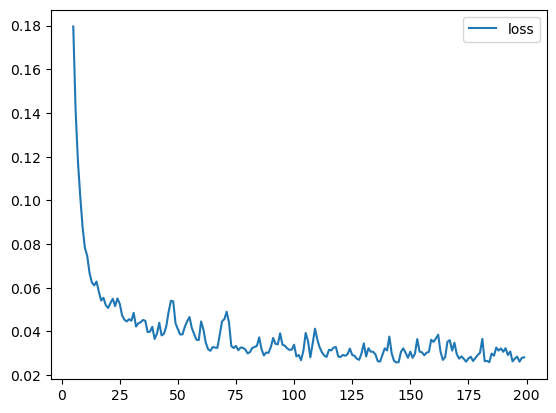

In [11]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5.
history_df.loc[5:, ['loss']].plot();

### Evaluate training
Check the tutorial for adjusting different values of learning rate, batch size, and number of examples. The graph can show you how the different values works in the training model.  In order to understand better, I asked ChatGPT about learning rate. 

Here's a brief interpretation of the provided learning rate and its potential effects:

A higher learning rate (e.g., close to 1) can lead to faster convergence, as the model parameters are updated more aggressively. However, it might also risk overshooting the optimal values and potentially diverging.

A lower learning rate (e.g., close to 0) can make the convergence slower but might provide more stability and accuracy. However, too small of a learning rate might result in very slow convergence or getting stuck in local minima.